In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("cleaned_data.csv")

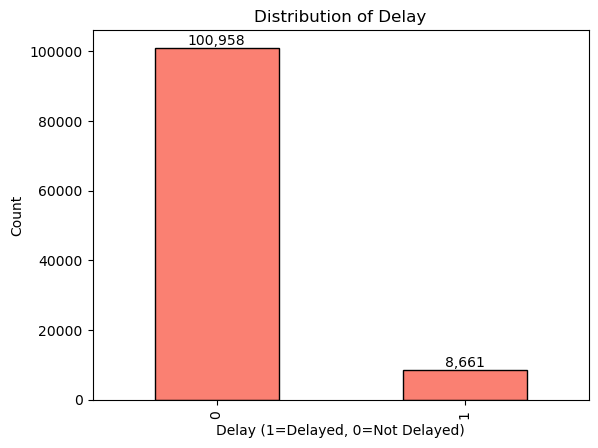

In [3]:
# Create the bar chart
ax = data['delay'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')

# Add values on top of the bars
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), ','),  # Format the number with commas if needed
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position of the text
        ha='center', va='bottom', fontsize=10, color='black'  # Text style
    )

# Add labels and title
plt.title('Distribution of Delay')
plt.xlabel('Delay (1=Delayed, 0=Not Delayed)')
plt.ylabel('Count')
plt.show()

## Product Properties Vs Delay

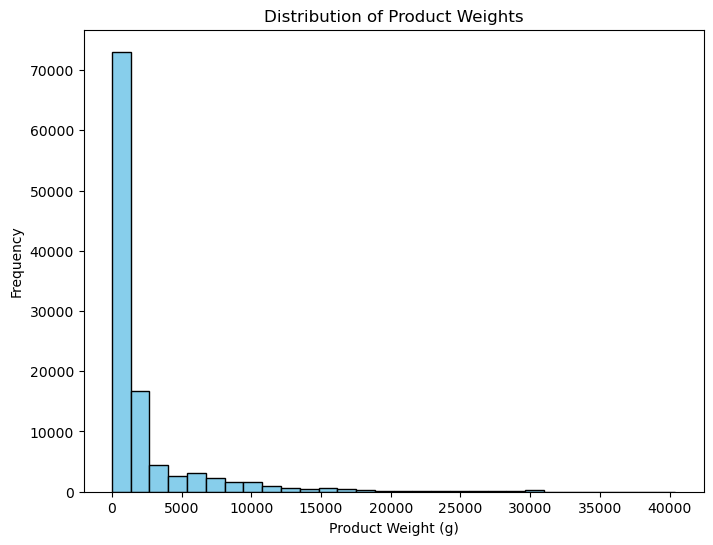

In [5]:
# Plot histogram for product weight
plt.figure(figsize=(8, 6))
plt.hist(data['product_weight_g'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Weights')
plt.xlabel('Product Weight (g)')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Define bins and labels for weight groups
weight_bins = range(0, 30001, 2000) # in grams
weight_labels = ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000',
 '10000-12000', '12000-14000', '14000-16000', '16000-18000',
 '18000-20000', '20000-22000', '22000-24000', '24000-26000',
 '26000-28000', '28000-30000']

# Create weight group column
data['weight_group'] = pd.cut(data['product_weight_g'], bins=weight_bins, labels=weight_labels, include_lowest=True)

# Calculate delay rate by weight group
delay_rate_by_weight = data.groupby('weight_group', observed=False)['delay'].mean()

# Convert to DataFrame for easier plotting
delay_rate_df = delay_rate_by_weight.reset_index()
delay_rate_df.columns = ['Weight Group', 'Delay Rate']

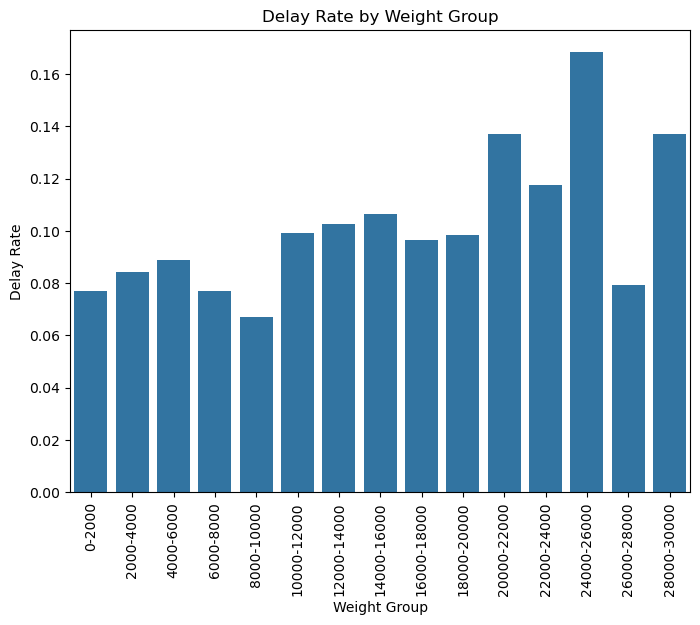

In [7]:
# Bar graph for weight groups and delay rate
plt.figure(figsize=(8, 6))
sns.barplot(x='Weight Group', y='Delay Rate', data=delay_rate_df)
plt.title('Delay Rate by Weight Group')
plt.xlabel('Weight Group')
plt.ylabel('Delay Rate')
# Rotate x-axis labels
plt.xticks(rotation=90)  # Rotate labels by 90 degrees
plt.show()

In [8]:
# Calculate product volume in cubic centimeters
data['product_volume_cm3'] = (
    data['product_length_cm'] * data['product_width_cm'] * data['product_height_cm']
)

# Preview the data
print(data[['product_volume_cm3', 'delay']].head())

   product_volume_cm3  delay
0              1976.0      0
1              4693.0      0
2              9576.0      0
3              6000.0      0
4             11475.0      0


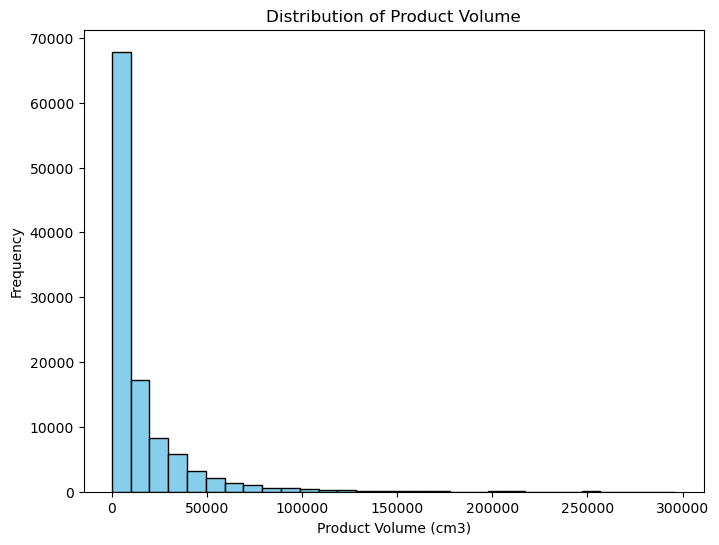

In [9]:
# Plot histogram for product volume
plt.figure(figsize=(8, 6))
plt.hist(data['product_volume_cm3'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Volume')
plt.xlabel('Product Volume (cm3)')
plt.ylabel('Frequency')
plt.show()

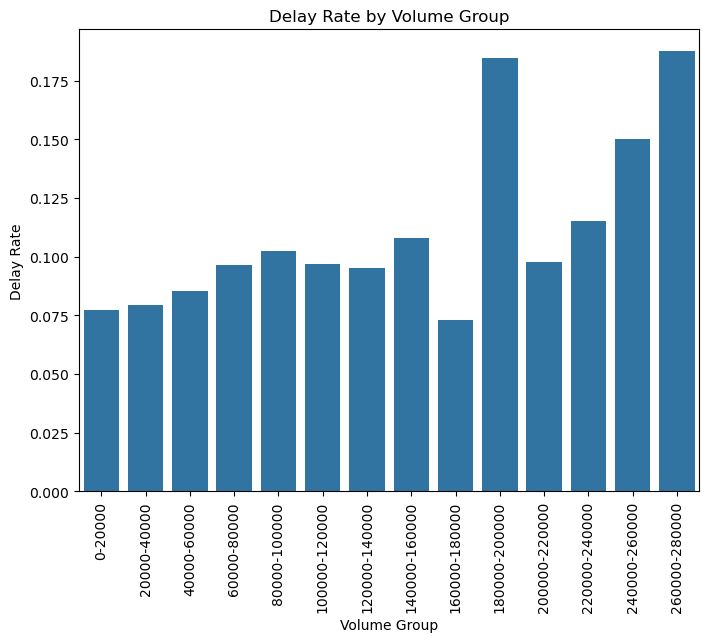

In [10]:
# Define bins and labels for volume
volume_bins = range(0, 280001, 20000)
volume_labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000',
 '100000-120000', '120000-140000', '140000-160000', '160000-180000',
 '180000-200000', '200000-220000', '220000-240000', '240000-260000',
 '260000-280000']

# Create volume group column
data['volume_group'] = pd.cut(data['product_volume_cm3'], bins=volume_bins, labels=volume_labels, include_lowest=True)

# Calculate delay rate by volume group
delay_rate_by_volume = data.groupby('volume_group', observed=False)['delay'].mean()

# Plot bar graph for volume vs delay
plt.figure(figsize=(8, 6))
sns.barplot(x=delay_rate_by_volume.index, y=delay_rate_by_volume.values)
plt.title('Delay Rate by Volume Group')
plt.xlabel('Volume Group')
plt.ylabel('Delay Rate')
# Rotate x-axis labels
plt.xticks(rotation=90)  # Rotate labels by 90 degrees
plt.show()

## Time Series Analysis

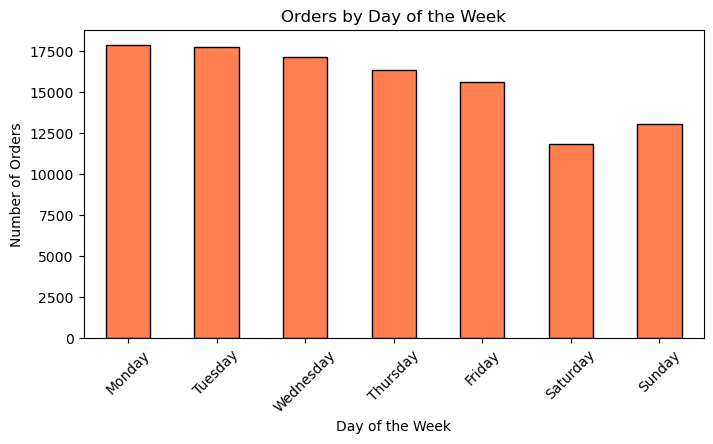

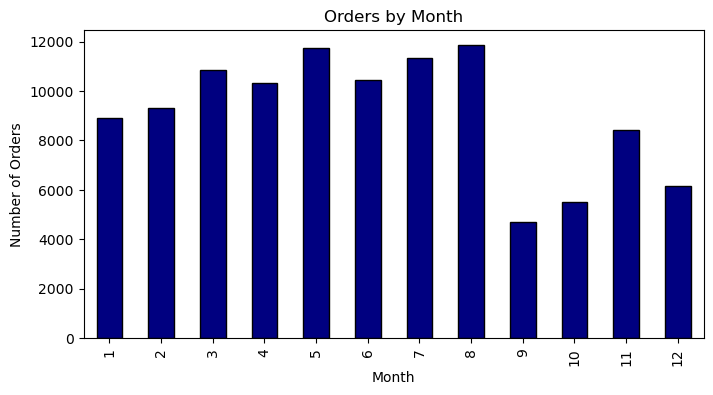

In [12]:
# Convert date columns to datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Extract day of the week and month
data['order_day_of_week'] = data['order_purchase_timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data['order_month'] = data['order_purchase_timestamp'].dt.month

# Map day numbers to day names
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the day of the week distribution
plt.figure(figsize=(8, 4))
data['order_day_of_week'].value_counts().sort_index().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Add custom labels to x-axis
plt.xticks(ticks=range(7), labels=day_labels, rotation=45)  # Rotate labels for better readability
plt.show()

# Plot the month distribution (no change needed for month labels)
plt.figure(figsize=(8, 4))
data['order_month'].value_counts().sort_index().plot(kind='bar', color='navy', edgecolor='black')
plt.title('Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

In [13]:
# Find the earliest and latest timestamps
start_date = data['order_purchase_timestamp'].min()
end_date = data['order_purchase_timestamp'].max()

print(f"Data starts in: {start_date.strftime('%B %Y')}")
print(f"Data ends in: {end_date.strftime('%B %Y')}")

Data starts in: September 2016
Data ends in: August 2018


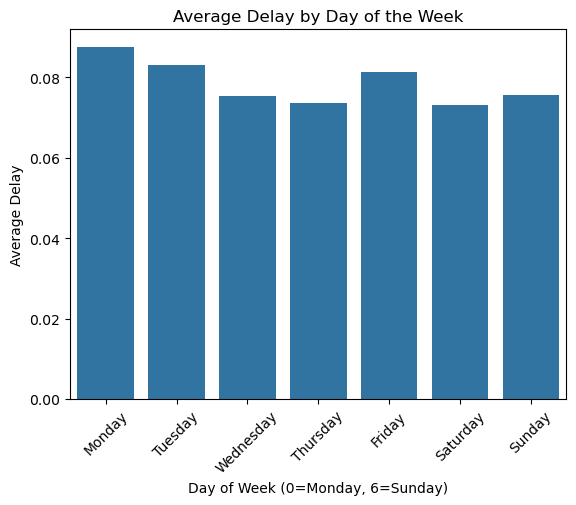

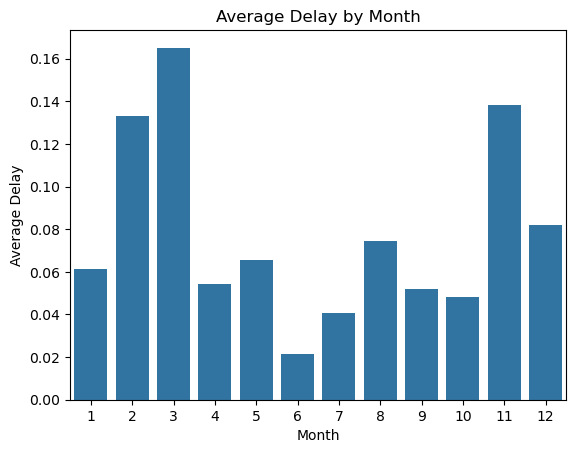

In [14]:
# Extracting day of the week and month from order timestamp
data['order_day_of_week'] = pd.to_datetime(data['order_purchase_timestamp']).dt.dayofweek  # Monday=0, Sunday=6
data['order_month'] = pd.to_datetime(data['order_purchase_timestamp']).dt.month

# Map day numbers to day names
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Check delay distribution by day of week
sns.barplot(x='order_day_of_week', y='delay', data=data, errorbar=None)
plt.title('Average Delay by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Delay')

# Add custom labels to x-axis
plt.xticks(ticks=range(7), labels=day_labels, rotation=45)  # Rotate labels for better readability
plt.show()

# Check delay distribution by month
sns.barplot(x='order_month', y='delay', data=data, errorbar=None)
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay')
plt.show()

In [29]:
# Extracting day of the week and month from order timestamp
data['order_day_of_week'] = pd.to_datetime(data['order_purchase_timestamp']).dt.dayofweek  # Monday=0, Sunday=6
data['order_month'] = pd.to_datetime(data['order_purchase_timestamp']).dt.month

# Map day numbers to day names
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate delay rate by volume group
delay_rate_by_day_of_week = data.groupby('order_day_of_week', observed=False)['delay'].mean()

# Check delay distribution by day of week
sns.barplot(x=delay_rate_by_day_of_week.index, y=delay_rate_by_day_of_week.values, data=data, errorbar=None)
plt.title('Average Delay by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Delay Rate')

# Add custom labels to x-axis
plt.xticks(ticks=range(7), labels=day_labels, rotation=45)  # Rotate labels for better readability
plt.show()

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 109619 and the vector passed to `x` has length 7.

In [ ]:
# Check delay distribution by month
sns.barplot(x='order_month', y='Delay Rate', data=data, errorbar=None)
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay')
plt.show()

# Calculate delay rate by volume group
delay_rate_by_day_of_week = data.groupby('order_day_of_week', observed=False)['delay'].mean()

# Plot bar graph for volume vs delay
plt.figure(figsize=(8, 6))
sns.barplot(x=delay_rate_by_volume.index, y=delay_rate_by_volume.values)
plt.title('Delay Rate by Volume Group')
plt.xlabel('Volume Group')
plt.ylabel('Delay Rate')
# Rotate x-axis labels
plt.xticks(rotation=90)  # Rotate labels by 90 degrees
plt.show()

## Geo Information

In [ ]:
customer_lats = data['geolocation_lat_customer']
customer_lngs = data['geolocation_lng_customer']
seller_lats = data['geolocation_lat_seller']
seller_lngs = data['geolocation_lng_seller']

# Scattermapbox for customer locations
customer_scatter = go.Scattermapbox(
    lon=customer_lngs,
    lat=customer_lats,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.6,
    ),
    name='Customers'
)

# Scattermapbox for seller locations
seller_scatter = go.Scattermapbox(
    lon=seller_lngs,
    lat=seller_lats,
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.6,
    ),
    name='Sellers'
)

# Map layout
layout = go.Layout(
    title='Customer and Seller Locations in Brazil',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoiaG9vbmtlbmc5MyIsImEiOiJjam43cGhpNng2ZmpxM3JxY3Z4ODl2NWo3In0.SGRvJlToMtgRxw9ZWzPFrA',
        center=dict(lat=-14.2350, lon=-51.9253),  # Center of Brazil
        zoom=4,  # Adjust zoom level
        style='carto-positron'  # Map style
    ),
    margin=dict(l=0, r=0, t=30, b=0)
)

# Combine customer and seller data
fig = go.Figure(data=[customer_scatter, seller_scatter], layout=layout)

# Display the map
fig.show()

In [ ]:
# Same state indicator
data['same_state'] = (data['geolocation_state_customer'] == data['geolocation_state_seller']).astype(int)

# Check correlation between same region and delay
sns.barplot(x='same_state', y='delay', data=data)
plt.title('Delay by Same State (1=Same State, 0=Different State)')
plt.xlabel('Same State')
plt.ylabel('Delay Rate')
plt.show()

In [ ]:
# Count the number of cases where customers and sellers are in the same region
same_state_count = data['same_state'].sum()

# Total number of cases for comparison
total_cases = data.shape[0]

# Calculate the percentage of same-region orders
same_state_percentage = (same_state_count / total_cases) * 100

print(f"Number of orders in the same state: {same_state_count}")
print(f"Total number of orders: {total_cases}")
print(f"Percentage of same-state orders: {same_state_percentage:.2f}%")

In [ ]:
# Convert latitude and longitude from degrees to radians
data['geolocation_lat_customer'] = np.radians(data['geolocation_lat_customer'])
data['geolocation_lng_customer'] = np.radians(data['geolocation_lng_customer'])
data['geolocation_lat_seller'] = np.radians(data['geolocation_lat_seller'])
data['geolocation_lng_seller'] = np.radians(data['geolocation_lng_seller'])

# Radius of Earth in kilometers
earth_radius = 6371  

# Calculate differences in coordinates
delta_lat = data['geolocation_lat_seller'] - data['geolocation_lat_customer']
delta_lng = data['geolocation_lng_seller'] - data['geolocation_lng_customer']

# Haversine formula to calculate distance
a = np.sin(delta_lat / 2)**2 + np.cos(data['geolocation_lat_customer']) * np.cos(data['geolocation_lat_seller']) * np.sin(delta_lng / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
data['distance_km'] = earth_radius * c

# Preview the new distance column
print(data[['geolocation_lat_customer', 'geolocation_lng_customer', 'geolocation_lat_seller', 'geolocation_lng_seller', 'distance_km']].head())

In [ ]:
# Plot a histogram of distances
plt.figure(figsize=(8, 6))
plt.hist(data['distance_km'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Filter for data with distances greater than 4000 km
outliers = data[data['distance_km'] > 4000]

# Display the number of outliers and the rows themselves
print(f"Number of rows with distance greater than 4000 km: {outliers.shape[0]}")
print(outliers[['distance_km', 'delay']])

In [ ]:
# Define bins and labels for distance intervals
distance_bins = range(0, 4001, 20)  # Bins from 0 to 4000 km in steps of 100 km
distance_labels = [(x + 50) for x in distance_bins[:-1]]  # Midpoints of the bins

# Create distance group column
data['distance_interval'] = pd.cut(data['distance_km'], bins=distance_bins, labels=distance_labels, include_lowest=True)

# Calculate delay rate for each distance interval
delay_rate_by_distance = data.groupby('distance_interval', observed=False)['delay'].mean()

# Convert to DataFrame for plotting
delay_rate_df = delay_rate_by_distance.reset_index()
delay_rate_df.columns = ['Distance Interval (km)', 'Delay Rate']

In [ ]:
# Scatter plot of distance and delay rate
plt.figure(figsize=(10, 6))
plt.scatter(delay_rate_df['Distance Interval (km)'], delay_rate_df['Delay Rate'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Distance and Delay Rate')
plt.xlabel('Distance Interval (km)')
plt.ylabel('Delay Rate')
plt.grid(True)
plt.show()

In [ ]:
# Define bins and labels again
bins = range(0, 3501, 500)  # Updated upper limit for the bins
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500']

# Create distance groups
data['distance_group'] = pd.cut(data['distance_km'], bins=bins, labels=labels, include_lowest=True)

# Calculate delay rate by distance group
delay_rate_by_distance = data.groupby('distance_group', observed=False)['delay'].mean()

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=delay_rate_by_distance.index, y=delay_rate_by_distance.values)
plt.title('Delay Rate by Distance Group')
plt.xlabel('Distance Group')
plt.ylabel('Delay Rate')
plt.show()

In [ ]:
# Select relevant columns for correlation analysis
relevant_columns = ['delay', 'product_weight_g', 'product_volume_cm3', 'order_day_of_week', 'order_month', 'same_state', 'distance_km',]

# Calculate correlation matrix
correlation_matrix = data[relevant_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix for Order and Features')
plt.show()